# Find locations in pixel coordinates

Interesting finds:

alpha value always 255. 4th value in the tuple

all locations are ordered on location except camping

### Find locations in pixel coordinates of colored pixels

In [131]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [132]:
# Load in the raw bmp data
img = mpimg.imread('..\..\data\MC1\Lekagul Roadways.bmp')

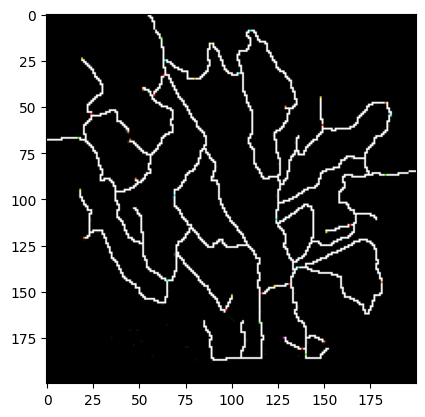

In [133]:
# show the image
plt.imshow(img)

In [134]:
img[1][1][:3]

array([0, 0, 0], dtype=uint8)

In [135]:
# find all pixels that are not white or black and get the coordinates of those pixels to store in a list
# this is to find the coordinates of the coloured pixels
width, height = img.shape[:2]
coordinates = []
for y in range(height):
    for x in range(width):
        rgb = img[x][y]
        if not rgb[0] == rgb[1] == rgb[2]:
            coordinates.append([x,y,rgb[:3]])


In [136]:
print(len(coordinates))
coordinates.sort()
coordinates

40


[[9, 110, array([  0, 255, 255], dtype=uint8)],
 [13, 62, array([ 76, 255,   0], dtype=uint8)],
 [16, 89, array([255, 216,   0], dtype=uint8)],
 [24, 19, array([255, 216,   0], dtype=uint8)],
 [25, 64, array([  0, 255, 255], dtype=uint8)],
 [32, 104, array([  0, 255, 255], dtype=uint8)],
 [33, 63, array([255,   0,   0], dtype=uint8)],
 [35, 80, array([255, 216,   0], dtype=uint8)],
 [41, 52, array([255, 106,   0], dtype=uint8)],
 [44, 58, array([255,   0,   0], dtype=uint8)],
 [45, 148, array([255, 216,   0], dtype=uint8)],
 [48, 183, array([255, 106,   0], dtype=uint8)],
 [50, 129, array([255, 106,   0], dtype=uint8)],
 [54, 24, array([255,   0,   0], dtype=uint8)],
 [55, 186, array([  0, 255, 255], dtype=uint8)],
 [60, 149, array([255,   0,   0], dtype=uint8)],
 [64, 44, array([255, 106,   0], dtype=uint8)],
 [67, 17, array([ 76, 255,   0], dtype=uint8)],
 [68, 45, array([255, 106,   0], dtype=uint8)],
 [87, 183, array([ 76, 255,   0], dtype=uint8)],
 [89, 48, array([255, 106,   0], 

### link locations to pixels

In [137]:
types = {'type':['general-gate', 'ranger-stop', 'entrance', 'camping', 'gate', 'ranger-base'],
         'color':[[0,255,255], [255,216,0], [76,255,0], [255,106,0], [255,0,0], [255,0,220]]}

In [138]:
for coordinate in coordinates:
    for i in range(len(types['type'])):
        if (coordinate[2]== types['color'][i]).all():
            coordinate.append(types['type'][i])

In [139]:
locations = []
for type in types['type']:
    count = 0
    for coordinate in coordinates:
        if coordinate[3] == type:
            if type == 'ranger-base':
                locations.append(f'{coordinate[3]}')
            else:
                locations.append(f'{coordinate[3]}{count}')
            count += 1

In [140]:
# show full array
np.set_printoptions(threshold=np.inf)
print(locations)

['general-gate0', 'general-gate1', 'general-gate2', 'general-gate3', 'general-gate4', 'general-gate5', 'general-gate6', 'general-gate7', 'ranger-stop0', 'ranger-stop1', 'ranger-stop2', 'ranger-stop3', 'ranger-stop4', 'ranger-stop5', 'ranger-stop6', 'ranger-stop7', 'entrance0', 'entrance1', 'entrance2', 'entrance3', 'entrance4', 'camping0', 'camping1', 'camping2', 'camping3', 'camping4', 'camping5', 'camping6', 'camping7', 'camping8', 'gate0', 'gate1', 'gate2', 'gate3', 'gate4', 'gate5', 'gate6', 'gate7', 'gate8', 'ranger-base']


In [141]:
# fixed issue with camping order
improved_locations = ['general-gate0', 'general-gate1', 'general-gate2', 'general-gate3', 'general-gate4', 'general-gate5', 'general-gate6', 'general-gate7', 'ranger-stop0', 'ranger-stop1', 'ranger-stop2', 'ranger-stop3', 'ranger-stop4', 'ranger-stop5', 'ranger-stop6', 'ranger-stop7', 'entrance0', 'entrance1', 'entrance2', 'entrance3', 'entrance4', 'camping0', 'camping8', 'camping1', 'camping2', 'camping3', 'camping4', 'camping5', 'camping7', 'camping6', 'gate0', 'gate1', 'gate2', 'gate3', 'gate4', 'gate5', 'gate6', 'gate7', 'gate8', 'ranger-base']


In [142]:
names = []
xy_coordinates = []

for color in types['color']:
    for coordinate in coordinates:
        if (coordinate[2]== color).all():
            names.append(improved_locations[0])
            improved_locations.pop(0)
            xy_coordinates.append([coordinate[0], coordinate[1]])

dict_coordinates = dict(zip(names, xy_coordinates))

In [143]:
dict_coordinates

{'general-gate0': [9, 110],
 'general-gate1': [25, 64],
 'general-gate2': [32, 104],
 'general-gate3': [55, 186],
 'general-gate4': [98, 69],
 'general-gate5': [111, 124],
 'general-gate6': [137, 136],
 'general-gate7': [144, 65],
 'ranger-stop0': [16, 89],
 'ranger-stop1': [24, 19],
 'ranger-stop2': [35, 80],
 'ranger-stop3': [45, 148],
 'ranger-stop4': [95, 18],
 'ranger-stop5': [118, 151],
 'ranger-stop6': [147, 123],
 'ranger-stop7': [152, 100],
 'entrance0': [13, 62],
 'entrance1': [67, 17],
 'entrance2': [87, 183],
 'entrance3': [167, 115],
 'entrance4': [184, 140],
 'camping0': [41, 52],
 'camping8': [48, 183],
 'camping1': [50, 129],
 'camping2': [64, 44],
 'camping3': [68, 45],
 'camping4': [89, 48],
 'camping5': [121, 20],
 'camping7': [145, 181],
 'camping6': [177, 150],
 'gate0': [33, 63],
 'gate1': [44, 58],
 'gate2': [54, 24],
 'gate3': [60, 149],
 'gate4': [114, 164],
 'gate5': [146, 131],
 'gate6': [151, 116],
 'gate7': [160, 97],
 'gate8': [181, 138],
 'ranger-base': [

### Add coordinates to data


In [144]:
import pandas as pd

In [145]:
df = pd.read_csv("..\..\data\MC1\SensorData.csv")

In [146]:
# add new columns to the dataframe with the coordinates of the locations
for row, data in df.iterrows():
    df.loc[row, 'x'] = dict_coordinates[data['gate-name']][0]
    df.loc[row, 'y'] = dict_coordinates[data['gate-name']][1]

In [147]:
df

,Timestamp,car-id,car-type,gate-name,x,y
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3,167.0,115.0
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1,25.0,64.0
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2,35.0,80.0
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0,16.0,89.0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2,32.0,104.0
...,...,...,...,...,...,...
171472,2016-05-31 23:40:13,20161031111001-854,6,ranger-stop2,35.0,80.0
171473,2016-05-31 23:42:08,20165831105856-579,1,general-gate4,98.0,69.0
171474,2016-05-31 23:43:13,20161031111001-854,6,general-gate1,25.0,64.0
171475,2016-05-31 23:49:45,20165831105856-579,1,general-gate7,144.0,65.0
